In [0]:
from keras.datasets import cifar10
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [0]:
# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
print(X_train[0].shape)

(32, 32, 3)


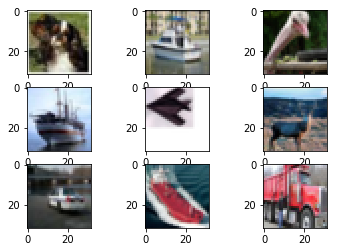

In [0]:
# create a grid of 3x3 images
for i in range(0, 9):
  plt.subplot(330 + 1 + i)
  img = X_train[500 + i].transpose([0, 1, 2])
  plt.imshow(img)
# show the plot
plt.show()

In [0]:
# Preprocessing the dataset

# Fix random seed for reproducibility
seed = 6
np.random.seed(seed)

# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the input from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

In [0]:
print(X_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [0]:
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [0]:
# hot encoder output
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_class = y_test.shape[1]
print(num_class)

print(y_train.shape)
print(y_train[0])


10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
# Building the All-CNN

In [0]:
# start by importing necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

In [0]:
# Define the model function

def allcnn(weights = None):
  
  # define model type- Sequential
  model = Sequential()

  # add model layers
  model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(32, 32, 3)))
  model.add(Activation('relu'))
  model.add(Conv2D(96, (3, 3), padding = 'same'))
  model.add(Activation('relu'))
  model.add(Conv2D(96, (3, 3), padding = 'same', strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(192, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(192, (3, 3), padding ='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(192, (3, 3), padding = 'same'))
  model.add(Activation('relu'))
  model.add(Conv2D(192, (1, 1), padding='valid'))
  model.add(Activation('relu'))
  model.add(Conv2D(10, (1, 1), padding='valid'))

  # add Global Average pooling Layer with Softmax Activation
  model.add(GlobalAveragePooling2D())
  model.add(Activation('softmax'))

  # laod the weights
  if weights:
    model.load_weights(weights)

  return model

In [0]:
# deifne hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build model an ddefine weights
weights = "all_cnn_weights_0.9088_0.4994.hdf5"
model = allcnn(weights)

# define optimzer and compile model
sgd = SGD(lr = learning_rate, decay = weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print(model.summary())

# test the model with pretrained weights
scores = model.evaluate(X_test, y_test, verbose=1)
print(f'Accuracy: {scores[1]}')

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_48 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_49 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 16, 16, 192)      

In [0]:
# define additional training parameters
#epochs = 1
#batch_size = 320

#fit the model 
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1)

In [0]:
  classes = range(0, 10)

  names = ['airplane',
           'automobile',
           'bird',
           'cat',
           'deer',
           'dog',
           'frog',
           'horse',
           'shipt',
           'truck']

# zip the names and classes to make a dictionary of class labels

class_label = dict(zip(classes, names))
print(class_label)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'shipt', 9: 'truck'}


In [0]:
# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(y_test[100:109], axis = 1)

# make predictions
predictions = model.predict(batch, verbose = 1)

9/9 [==============================] - 0s 11ms/step


In [0]:
print(predictions.shape)

(9, 10)


In [0]:
# these are class probabilities, should sum to 1

for image in predictions:
  print(np.sum(image))

1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [0]:
# use np.argmax() to convert class probabilities to class labels
class_result = np.argmax(predictions, axis = -1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


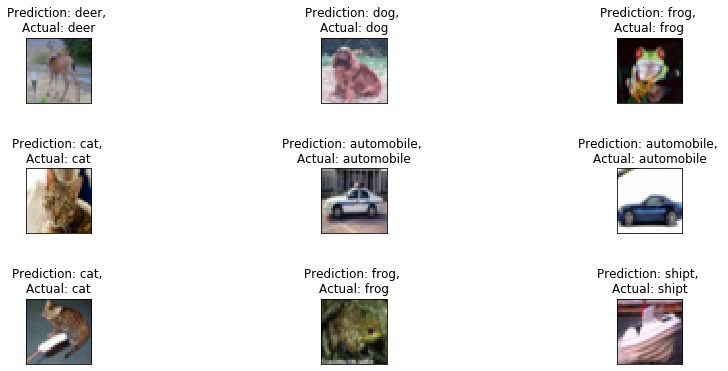

In [0]:
# create a grid of 3x3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()


for i, img in enumerate(batch):
  
  # determine label for each prediction, set title
  for key, value in class_label.items():
    if class_result[i] == key:
      title = (f"Prediction: {class_label[key]}, \nActual: {class_label[labels[i]]}")
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  # plot the image
  axs[i].imshow(img.transpose([0, 1, 2]))

# show the plot
plt.show()